# Multivariate linear regression

### Problem statement: Predicting the concrete compressive strength (in MPa) based on 8 factors, namely amount of cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate (all of these in the unit of kg, for every m^3 mixture) and age (in days). A linear model will be fit into this dataset, procured from UCI dataset repository.

In [84]:
#Import the relevant libraries that will be required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_excel('Concrete_Data.xls')
Xj = df[:1025] #Slicing the array to save the last training example for prediction
test_X = df[1025:1030]
y = np.array(Xj['Strength']).reshape(1025, 1)
test_y = np.array(test_X['Strength']).reshape(5, 1)
del Xj['Strength'] #The Xj array doesn't contain the y varaible values
del test_X['Strength']
print(Xj.head(), '\n')
print('Printing the corresponding values for strength of concrete:\n', y)
m = len(Xj) #Storing the number of training examples
print('The number of training examples in the data set:', m)

   Cement  Blast  Fly Ash  Water  Superplasticizer  Coarse Aggregate  \
0   540.0    0.0      0.0  162.0               2.5            1040.0   
1   540.0    0.0      0.0  162.0               2.5            1055.0   
2   332.5  142.5      0.0  228.0               0.0             932.0   
3   332.5  142.5      0.0  228.0               0.0             932.0   
4   198.6  132.4      0.0  192.0               0.0             978.4   

   Fine Aggregate  Age  
0           676.0   28  
1           676.0   28  
2           594.0  270  
3           594.0  365  
4           825.5  360   

Printing the corresponding values for strength of concrete:
 [[79.98611076]
 [61.88736576]
 [40.26953526]
 ...
 [41.54230795]
 [39.45595358]
 [37.91704314]]
The number of training examples in the data set: 1025


In [85]:
X0 = np.ones(len(Xj), dtype = float).reshape(1025, 1) #creating the X0 rows on 1s
X = np.append(X0, Xj, axis=1).reshape(1025, 9) #Creating the final X features array
theta = np.zeros((9, 1)) #Initialising all theta values to zero

In [86]:
def computeCost(X, y, theta):
    J = (1/(2*m))*(np.sum(np.square((X @ theta) - y)))
    return J;

print('The cost function output for all theta as zeros:', computeCost(X, y, theta))

The cost function output for all theta as zeros: 781.9315016079057


In [87]:
alpha = 0.000001
iterations = 2000 #We will run our gradient descent for these iterations

def gradientDescent(X, y, theta, alpha, iterations, m):
    J_history = np.zeros(iterations).reshape(iterations, 1)
    for iter in range(iterations):
        theta = theta - ((alpha/m)*(X.transpose() @ ((X @ theta)-y)))
        J_history[iter] = computeCost(X, y, theta)
    return [theta, J_history]

returned = gradientDescent(X, y, theta, alpha, iterations, m)
theta = returned[0]
J_history = returned[1]

print("Printing the theta vector:\n", theta)

Printing the theta vector:
 [[-5.37770025e-05]
 [ 1.16762869e-01]
 [ 9.61071519e-02]
 [ 9.07932586e-02]
 [-1.37161028e-01]
 [ 3.37246348e-02]
 [ 1.00151539e-03]
 [ 1.28429525e-02]
 [ 1.05073764e-01]]


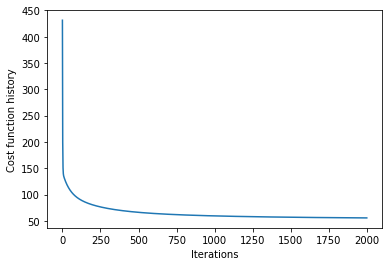

In [88]:
#We will also plot the value of the cost function after each iteration, to see if the value reach a minimum and converge to a
#stabalised value
plt.xlabel('Iterations')
plt.ylabel('Cost function history')
plt.plot(range(2000), J_history)

In [89]:
#As we can see, the model has converged into a constant value, that means our regression model is created sucessfully.
#Let's compare the results with the actual values.
#We will consider our test set and compare our training model values with the the original.

test_X0 = np.ones(len(test_X), dtype = float).reshape(5, 1) #creating the X0 rows on 1s
test_X = np.append(test_X0, test_X, axis=1).reshape(5, 9) #Creating the final X features array
prediction = test_X @ theta
std_deviation = math.sqrt((np.sum(np.square(test_y-prediction)))/5)
print('The values for each of the test set examples in an array is:\n', prediction)
print('Comparing the original values in our test set:\n', test_y)
print('The standard deviation of the values is:', std_deviation)

The values for each of the test set examples in an array is:
 [[40.96701712]
 [35.7914805 ]
 [28.22482805]
 [26.8807061 ]
 [33.59457316]]
Comparing the original values in our test set:
 [[44.284354  ]
 [31.1787942 ]
 [23.69660064]
 [32.76803638]
 [32.40123514]]
The standard deviation of the values is: 4.215949613768231


In [90]:
#As we can observe, there is still a significant deviation from the original value, which is expected, as cost isn't zero.
#This examples also shows that multivariate linear regression even after convergence can fail to fit perfectly for complicated
#scenarios such as this one. There thus arises for a more advanced manner for fitting a model.